# Lab 8 – Distances and PCA

Name 1: Nick Satriano 
Name 2: Jake Luther

Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2023
Due: Monday, Feb. 20
Instructor: Brian King


# Objectives
* Practice more `pandas`
* Use chi-squared test to evaluate two categorical variables for independence
* Learn about implementing distance matrices
* Learn how to employ PCA
* A bit more with visualizations

# Partnerships
I'm encouraging you to consider working with a partner. It's not required yet, but you are strongly encouraged to do so. If the material is complex to you, talking out what you are doing with a partner can have tremendous benefits. And, if you do, both partners must be listed in the top cell above.

# Directions
Work through this lab, and enter the answers to questions that are scattered throughout this lab. It is quite likely you'll need to add additional imports as you work through the lab. Just add them to the top cell if you use them. Most expected imports are added for you already.



In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


---
**1)**	[P] Set up a pandas data frame with the following 8 observations and 3 variables.

```
   test1      test2  test3
A0     A  excellent     25
A1     C       fair     32
A2     C       good     60
A3     B       fair     53
A4     A       poor     23
A5     B  excellent     37
A6     C       good     45
A7     B       good     49
```

Be sure to set the types of each variable as follows:
* `test1`: Nominal, levels = { "A", "B", C" }
* `test2`: Ordinal, levels = { "poor", "fair", "good", "excellent" }
* `test3`: Numeric

Use `pd.Categorical` for the nominal and ordinal variables (and pay attention to the `ordered` parameter.) Name the data frame `df`. Set the `index` correctly to match the row names in the table above.

Display the `df` data frame, and then show the output of `df.info()` to show the type of each variable in `df`.

In [3]:
# ANSWER
data = {
    'test1': pd.Categorical(['A', 'C', 'C', 'B', 'A', 'B', 'C', 'B'], categories=['A', 'B', 'C']),
    'test2': pd.Categorical(['excellent', 'fair', 'good', 'fair', 'poor', 'excellent', 'good', 'good'], categories=['poor', 'fair', 'good', 'excellent'], ordered=True),
    'test3': [25, 32, 60, 53, 23, 37, 45, 49]
}

df = pd.DataFrame(data, index=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'])

print(df)

df.info()

del data


   test1      test2  test3
A0     A  excellent     25
A1     C       fair     32
A2     C       good     60
A3     B       fair     53
A4     A       poor     23
A5     B  excellent     37
A6     C       good     45
A7     B       good     49
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, A0 to A7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   test1   8 non-null      category
 1   test2   8 non-null      category
 2   test3   8 non-null      int64   
dtypes: category(2), int64(1)
memory usage: 480.0+ bytes


---
**2)**	[MP] Show the output of `df.describe(include='all')`. What does the `include='all'` parameter do?

In [6]:
# ANSWER
df.describe(include="all")



,test1,test2,test3
count,8,8,8.000000
unique,3,4,NaN
top,B,good,NaN
freq,3,3,NaN
mean,NaN,NaN,40.500000
std,NaN,NaN,13.416408
min,NaN,NaN,23.000000
25%,NaN,NaN,30.250000
50%,NaN,NaN,41.000000
75%,NaN,NaN,50.000000


**ANSWER:**
The include = "all" parameter prints all rows of the describe data for all attributes of the data, regardless of their type.


---
**3)**	[PM] Show the output of `df.test1.cat.categories`, and `df.test2.cat.categories`. What is this showing? Does it work for `df.test3.cat.categories`?

In [10]:
# ANSWER
print("test1:", df.test1.cat.categories)
print("test2:",df.test2.cat.categories)
# print("test3:",df.test3.cat.categories)


test1: Index(['A', 'B', 'C'], dtype='object')
test2: Index(['poor', 'fair', 'good', 'excellent'], dtype='object')


**ANSWER:**
This does not work for df.test3! For the other two tests, the category index names are printed and the dtype is printed as well.

---
**4)**	[PM] Show the output of `df.test1.cat.codes`, and `df.test2.cat.codes`. What is this showing?

In [11]:
# ANSWER
print("test1:",df.test1.cat.codes)
print("test2:",df.test2.cat.codes)

test1: A0    0
A1    2
A2    2
A3    1
A4    0
A5    1
A6    2
A7    1
dtype: int8
test2: A0    3
A1    1
A2    2
A3    1
A4    0
A5    3
A6    2
A7    2
dtype: int8


**ANSWER:**
With the calls to cat.codes for each test, the printed table contains a numerical representation for each of the categorical values.


---
**5)** [P] Report the counts of each level of the categorical variables.

In [15]:
# ANSWER
print("test1:\n", df.test1.value_counts())
print("test2:\n", df.test2.value_counts())


test1:
 B    3
C    3
A    2
Name: test1, dtype: int64
test2:
 good         3
fair         2
excellent    2
poor         1
Name: test2, dtype: int64


---
**6)** [P] Report a cross tabulation (i.e. contingency table) between `test1` and `test2`. Include the margins (i.e. the sum of the rows and the columns) in your reported table (HINT: Look up pandas `crosstab()` function).

Your results should look something like this:

```
test2  poor  fair  good  excellent  All
test1
A         1     0     0          1    2
B         0     1     1          1    3
C         0     1     2          0    3
All       1     2     3          2    8
```


In [16]:
# ANSWER
pd.crosstab(df['test1'], df['test2'], margins=True)



test2,poor,fair,good,excellent,All
test1,,,,,
A,1,0,0,1,2
B,0,1,1,1,3
C,0,1,2,0,3
All,1,2,3,2,8


---
**7)** [P] From the previous table, store the contingency table without the margins in a variable called `observed`

In [24]:
# ANSWER
observed = pd.crosstab(df['test1'], df['test2'], margins=False)



---
**8)** [P] Run a chi-squared test for independence using the contingency table from the previous step. Clearly report the chi2 statistic, the p value, and the degrees of freedom, and then use the p-value to clearly state whether `test1` and `test2` are independent in your Python code (no markdown).

In [26]:
# ANSWER - Assisted by chatGPT
from scipy.stats import chi2_contingency

chi_test, p_val, dof, exp_freq = chi2_contingency(observed)

print(f"Chi-squared statistic: {chi_test:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_val:.4f}")



Chi-squared statistic: 6.44
Degrees of freedom: 6
P-value: 0.3753


---
Now, you're going to explore some similarities between observations. Yes, this is a SMALL dataset! (Don't bother to explore large data until you can understand how they work on small, toy experimental data!)

Before you can compute a pairwise distance matrix to report the distance between all pairs of observations, always remember that **you can only compute distances between strictly numeric data.** Therefore, you must convert your data to numeric types for ALL variables you want to include in your distance metric.

---
**9)** Create a new data frame called `df_num` that represents a numeric version of the above. Do NOT do any rescaling of your variables yet!

NOTE: If you do this from a dataframe that has the categorical variables set up properly, then this step is simple to do. The two choices I generally follow are either:

   1. use the cat member of your categorical data, which stores a `CategoricalAccessor` object (look it up), or
   2. use one of the encoders in the `sklearn.preprocessing` module.

The first option is easier, and yet another reason why it's so important to take the time to preprocess your data as correctly and error-free as possible.

If you do it correctly, your resulting dataframe should look something like this:
```
    test1  test2  test3
A0      0      3     25
A1      2      1     32
A2      2      2     60
A3      1      1     53
A4      0      0     23
A5      1      3     37
A6      2      2     45
A7      1      2     49
```

In [30]:
# ANSWER
df_num = df.copy()

df_num["test1"] = df_num["test1"].cat.codes
df_num["test2"] = df_num["test2"].cat.codes

df_num


,test1,test2,test3
A0,0,3,25
A1,2,1,32
A2,2,2,60
A3,1,1,53
A4,0,0,23
A5,1,3,37
A6,2,2,45
A7,1,2,49


---
**10)** [P] As you learned in lecture, you absolutely must rescale your data to fall on a similar scale for most methods to be meaningful. There are different approaches to doing so. A standardized zscore is among the most common, but not necessarily always the best approach, especially when you are dealing with numeric representations of true categorical data. Rescaling your data to all fall between 0 and 1 is also a common approach, particularly when you have categorical data.

Let's first try to rescale our data to all fall between the values of 0 and 1. Use the `MinMaxScaler` in `sklearn.preprocessing` to rescale all variables to fall between 0 and 1. Store the transformed data as a pandas data frame called `df_num_zeroone`. Your result should look as follows:

```
    test1     test2     test3
A0    0.0  1.000000  0.054054
A1    1.0  0.333333  0.243243
A2    1.0  0.666667  1.000000
A3    0.5  0.333333  0.810811
A4    0.0  0.000000  0.000000
A5    0.5  1.000000  0.378378
A6    1.0  0.666667  0.594595
A7    0.5  0.666667  0.702703
```



In [43]:
# ANSWER - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()

num_zeroone = scaler.fit_transform(df_num)

df_num_zeroone = pd.DataFrame(num_zeroone, columns=df_num.columns, index=df_num.index)

df_num_zeroone


,test1,test2,test3
A0,0.0,1.000000,0.054054
A1,1.0,0.333333,0.243243
A2,1.0,0.666667,1.000000
A3,0.5,0.333333,0.810811
A4,0.0,0.000000,0.000000
A5,0.5,1.000000,0.378378
A6,1.0,0.666667,0.594595
A7,0.5,0.666667,0.702703


---
**11)**	Notice the value of `test3`. It's OK, but there are times we have solid knowledge of what we expect our range to be. We can (and usually should) rescale our data using that knowledge. In the case of `test3`, suppose that you learned that the data must fall between 0 and 100.

Reassign `test3` so that the min and max before rescaling are assuming to be between 0 and 100, respectively. (i.e. simply divide the original variable by 100!)

In [48]:
# ANSWER - Assisted by chatGPT
df_num_zeroone.test3 = df_num.test3.apply(lambda x : x / 100)

df_num_zeroone


,test1,test2,test3
A0,0.0,1.000000,0.25
A1,1.0,0.333333,0.32
A2,1.0,0.666667,0.60
A3,0.5,0.333333,0.53
A4,0.0,0.000000,0.23
A5,0.5,1.000000,0.37
A6,1.0,0.666667,0.45
A7,0.5,0.666667,0.49


---
**12)**	[P] Compute a single distance matrix called `distmat_zeroone`. Use a standard Euclidean distance measure. Your reported result should be an 8x8 matrix with appropriately labeled rows and columns. (HINT – study the output of the distance matrix functions. They do not output a square matrix. As discussed in lecture you can use either `pairwise_distances` from scikit-learn, or the `pdist` and `squareform` functions in `scipy.spatial.distance`). Be sure to label the rows and columns to be the index from the input dataframe. Round it to 3 significant digits.

Your result should look something like this...
```
       A0     A1     A2     A3     A4     A5     A6     A7
A0  0.000  1.204  1.111  0.879  1.000  0.514  1.073  0.647
A1  1.204  0.000  0.435  0.542  1.058  0.835  0.358  0.625
A2  1.111  0.435  0.000  0.605  1.258  0.643  0.150  0.512
A3  0.879  0.542  0.605  0.000  0.672  0.686  0.606  0.336
A4  1.000  1.058  1.258  0.672  0.000  1.127  1.222  0.873
A5  0.514  0.835  0.643  0.686  1.127  0.000  0.606  0.354
A6  1.073  0.358  0.150  0.606  1.222  0.606  0.000  0.502
A7  0.647  0.625  0.512  0.336  0.873  0.354  0.502  0.000
```

In [50]:
# ANSWER
distmat_zeroone = pairwise_distances(df_num_zeroone, metric="euclidean").round(3)

distmat_zeroone = pd.DataFrame(distmat_zeroone, columns=df_num_zeroone.index, index=df_num_zeroone.index)

distmat_zeroone


,A0,A1,A2,A3,A4,A5,A6,A7
A0,0.000,1.204,1.111,0.879,1.000,0.514,1.073,0.647
A1,1.204,0.000,0.435,0.542,1.058,0.835,0.358,0.625
A2,1.111,0.435,0.000,0.605,1.258,0.643,0.150,0.512
A3,0.879,0.542,0.605,0.000,0.672,0.686,0.606,0.336
A4,1.000,1.058,1.258,0.672,0.000,1.127,1.222,0.873
A5,0.514,0.835,0.643,0.686,1.127,0.000,0.606,0.354
A6,1.073,0.358,0.150,0.606,1.222,0.606,0.000,0.502
A7,0.647,0.625,0.512,0.336,0.873,0.354,0.502,0.000


---
**13)**	[P] Output the top three closest (i.e. most similar) pairs of observations. You MUST write Python code to report these results! Do not simply print out your distance matrix and tell me your answers! Consider that this may have been thousands of observations! Always generate reported answers in code!

For each pair, output the pair of observations from the original dataframe and the distance between them.

(HINT: I actaully found this easiest to do with the output of `pdist` with the `sorted` function.)

Your first closest pair output might have output that looks something like this:

```
Closest: # 0 : ['A2', 'A6'] dist=0.150
   test1 test2  test3
A2     C  good     60
A6     C  good     45
```


In [95]:
# ANSWER:
count = 0

for i in [1, 3, 5]:
    closest = distmat_zeroone.stack().loc[lambda x: x != 0].sort_values()
    print("Closest: #", count, ":", closest.index[i], " dist=", closest[i])
    print(df.loc[closest.index[i:i+1][0],:])
    print()
    count += 1

Closest: # 0 : ('A2', 'A6')  dist= 0.15
   test1 test2  test3
A2     C  good     60
A6     C  good     45

Closest: # 1 : ('A7', 'A3')  dist= 0.336
   test1 test2  test3
A7     B  good     49
A3     B  fair     53

Closest: # 2 : ('A7', 'A5')  dist= 0.354
   test1      test2  test3
A7     B       good     49
A5     B  excellent     37



---
**14)**	[P] Output the three observations that are *least similar*, with the two most distant observations output first. Again, for each pair, output the two observations, and the distance between them

In [98]:
# ANSWER
count = 0

for i in [1, 3, 5]:
    furthest = distmat_zeroone.stack().loc[lambda x: x != 0].sort_values(ascending=False)
    print("Furthest: #", count, ":", furthest.index[i], " dist=", furthest[i])
    print(df.loc[furthest.index[i:i+1][0],:])
    print()
    count += 1




Furthest: # 0 : ('A2', 'A4')  dist= 1.258
   test1 test2  test3
A2     C  good     60
A4     A  poor     23

Furthest: # 1 : ('A4', 'A6')  dist= 1.222
   test1 test2  test3
A4     A  poor     23
A6     C  good     45

Furthest: # 2 : ('A1', 'A0')  dist= 1.204
   test1      test2  test3
A1     C       fair     32
A0     A  excellent     25



---
**15)**	[P] Create a new data frame, `df_num_binarized`, that stores a *binarized* version for `test1` and `test2`. The variable `test3` is already numeric, scaled to fall between 0 and 1 already. So, once you've created `df_num_binarized`, then copy the variable `test3` from `df_num_zeroone` to `df_num_binarized`.

(HINT: Remember, `pd.get_dummies` makes this quite easy to do, or you could use `OneHotEncoder` from `sklearn.preprocessing` and set `sparse=False, dtype=int`)

Your first row might look something like the following:
```
    test1_A  test1_B  test1_C  test2_poor  test2_fair  test2_good  test2_excellent  test3
A0        1        0        0           0           0           0                1   0.25
```


In [100]:
# ANSWER
df_num_binarized = pd.get_dummies(df, columns = ["test1", "test2"])
df_num_binarized["test3"] = df_num_zeroone["test3"]

df_num_binarized




,test3,test1_A,test1_B,test1_C,test2_poor,test2_fair,test2_good,test2_excellent
A0,0.25,1,0,0,0,0,0,1
A1,0.32,0,0,1,0,1,0,0
A2,0.60,0,0,1,0,0,1,0
A3,0.53,0,1,0,0,1,0,0
A4,0.23,1,0,0,1,0,0,0
A5,0.37,0,1,0,0,0,0,1
A6,0.45,0,0,1,0,0,1,0
A7,0.49,0,1,0,0,0,1,0


---
**16)**	[P] Now, compute `distmat_binarized` by computing the distance matrix for the df_binarized.

In [102]:
# ANSWER
distmat_binarized = pairwise_distances(df_num_binarized, metric="euclidean").round(3)
distmat_binarized = pd.DataFrame(distmat_binarized, columns = df_num_binarized.index, index = df_num_binarized.index)
distmat_binarized


,A0,A1,A2,A3,A4,A5,A6,A7
A0,0.000,2.001,2.030,2.020,1.414,1.419,2.010,2.014
A1,2.001,0.000,1.442,1.430,2.002,2.001,1.420,2.007
A2,2.030,1.442,0.000,2.001,2.034,2.013,0.150,1.418
A3,2.020,1.430,2.001,0.000,2.022,1.423,2.002,1.415
A4,1.414,2.002,2.034,2.022,0.000,2.005,2.012,2.017
A5,1.419,2.001,2.013,1.423,2.005,0.000,2.002,1.419
A6,2.010,1.420,0.150,2.002,2.012,2.002,0.000,1.415
A7,2.014,2.007,1.418,1.415,2.017,1.419,1.415,0.000


---
**17)**	[P] Report the three closest pairs, and the three most distant pairs from distmat_binarized

In [109]:
# ANSWER
closest = distmat_binarized.stack().loc[lambda x: x != 0].sort_values().head(5)
print("Closest:\n", closest.iloc[::2], "\n")
furthest = distmat_binarized.stack().loc[lambda x: x != 0].sort_values(ascending=False).head(5)
print("Furthest:\n", furthest.iloc[::2])



Closest:
 A6  A2    0.150
A0  A4    1.414
A3  A7    1.415
dtype: float64 

Furthest:
 A2  A4    2.034
    A0    2.030
A4  A3    2.022
dtype: float64


---
**18)**	[M] Take a moment and compare and contrast your results. Which method do you think have the better results? Why? Which variable do you think was the distinguishing player in affecting the different outcomes between both of the above approaches to transforming your data to numeric results? Summarize what would have been the best transformation to make for all three variables.

**ANSWER:**



---
**19)**	[P] Load in your next dataset using the following:

`df_car_crashes = sns.load_dataset('car_crashes')`

The dataset is directly downloaded from:
[https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv](https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv)

So, your first step with any new dataset is to understand your data. What are the variables? What does each observation represent? Sometimes, it's easy to figure out. Just Google! And, sometimes we need to make the best guess regarding our variables. For now, don't worry too much about specifics. This is a very simplified, highly aggregated dataset from much more extensive stats drawn from the [Insurance Institute for Highway Safety](https://www.iihs.org/iihs/topics/t/general-statistics/fatalityfacts/state-by-state-overview) (NOTE - this might make a great repository for some project?)

In [6]:
# ANSWER
df_car_crashes = sns.load_dataset('car_crashes')
df_car_crashes


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


---
**20)**	[P] Preprocess your data. Minimally, you should move the state code to become the index for the dataframe, and then drop that column from your dataframe.

In [7]:
# ANSWER
df_car_crashes = df_car_crashes.set_index("abbrev")

df_car_crashes.head(5)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


---
**21)**	[P] Create a new dataframe called `df_car_crashes_zscore` that represents the zscore transformation for `df_car_crashes`. Again, show the first five rows.



In [8]:
# ANSWER
df_car_crashes_zscore = stats.zscore(df_car_crashes)

df_car_crashes_zscore.head(5)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178


---
**22)**	[P] Create a distance matrix called `distmat_cars` based on the `df_car_crashes_zscore`. Display the entire distance matrix (which will likely be simplified visually due to its size)

In [16]:
# ANSWER
distmat_cars = pairwise_distances(df_car_crashes_zscore, metric = "euclidean")

distmat_cars = pd.DataFrame(distmat_cars, columns=df_car_crashes_zscore.index, index=df_car_crashes_zscore.index)

distmat_cars



abbrev,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
abbrev,,,,,,,,,,,,,,,,,,,,,
AL,0.000000,1.848559,1.875942,2.616265,3.450372,2.687193,4.022977,2.426745,6.627070,2.863217,...,2.272782,1.760396,1.768022,4.073530,2.984473,3.691474,4.099448,2.658679,3.882304,1.345666
AK,1.848559,0.000000,1.461454,2.961700,3.503615,2.674699,3.719860,1.305465,5.923340,2.014017,...,3.030764,2.612893,1.983290,3.820444,3.230915,3.939532,3.874399,2.759540,4.080096,1.794331
AZ,1.875942,1.461454,0.000000,2.592934,3.873068,2.690949,4.341409,2.322674,6.312294,2.471886,...,1.805917,2.413952,2.496229,3.638752,2.564600,3.910659,3.716797,3.094545,3.452450,1.165002
AR,2.616265,2.961700,2.592934,0.000000,4.773783,4.082043,5.511677,3.375632,7.648001,2.722795,...,2.756086,2.090210,2.858256,5.375719,4.012612,4.577666,5.500790,2.401244,5.215076,3.105415
CA,3.450372,3.503615,3.873068,4.773783,0.000000,1.382473,1.360401,2.801377,3.725440,3.294284,...,4.729624,2.984643,4.199246,2.525129,2.637784,1.211871,2.322342,5.589191,3.094339,3.392714
CO,2.687193,2.674699,2.690949,4.082043,1.382473,0.000000,2.171261,2.348937,4.294426,2.884757,...,3.599348,2.449727,3.623915,1.893114,1.579660,1.580230,1.824522,4.943274,2.114426,2.217199
CT,4.022977,3.719860,4.341409,5.511677,1.360401,2.171261,0.000000,2.792618,3.100788,3.490418,...,5.401468,3.816674,4.346224,3.070455,3.461110,2.371614,2.500124,5.938001,3.628320,3.899592
DE,2.426745,1.305465,2.322674,3.375632,2.801377,2.348937,2.792618,0.000000,5.106619,1.442845,...,3.827587,2.556844,2.171300,3.771261,3.324290,3.389056,3.571201,3.438088,4.037819,2.427114
DC,6.627070,5.923340,6.312294,7.648001,3.725440,4.294426,3.100788,5.106619,0.000000,5.343223,...,7.356393,6.230942,7.019399,3.805078,4.898792,3.999740,3.303523,8.418524,4.939871,6.196665


---
**23)**	[P] An interesting way to suggest outliers is to take a distance matrix, aggregate the mean over each row or column, then sort the output in order. Why would this work? Because an observation that is an outlier should have a relatively high mean distance to all other observations! Do this, and output the list in descending order. (HINT: DC should be your largest outlier, listed first.)

In [18]:
# ANSWER
distmat_cars_mean = distmat_cars.mean().sort_values(ascending = False)

distmat_cars_mean


abbrev
DC    5.265664
ND    5.257310
SC    5.214264
LA    4.767480
MT    4.759816
WV    4.512766
NJ    4.310802
MA    4.197513
MS    4.048305
AR    3.897635
MD    3.749939
MN    3.719807
OK    3.618059
HI    3.591755
SD    3.585247
TX    3.572109
NY    3.531806
CT    3.514075
WI    3.468777
ID    3.440899
PA    3.440610
UT    3.438146
RI    3.434056
WA    3.296993
FL    3.205449
VA    3.156358
OR    3.130498
CA    3.116879
ME    3.105251
NH    3.100905
IA    3.098437
AK    3.091304
MI    3.072811
NE    3.065206
AL    3.033363
DE    3.021971
AZ    2.999864
TN    2.965254
KY    2.964333
NM    2.914953
IN    2.841386
WY    2.839487
VT    2.820077
NC    2.777656
OH    2.746863
MO    2.734449
GA    2.726648
NV    2.627495
CO    2.617432
IL    2.602264
KS    2.573618
dtype: float64

----
**24)**	[M] From this analysis, which 3 states seem to be the outliers?

**ANSWER:**
DC, ND, and SC all seem to be the outliers for this data.


---
**25)**	[P] OK. Let's explore the data visually. First, using the original, unscaled data frame `df_car_crashes`, create a scatter plot of insurance premiums vs. insurance losses, with total number of accidents as the size of the point. Create a label near to every point representing the two letter state code.

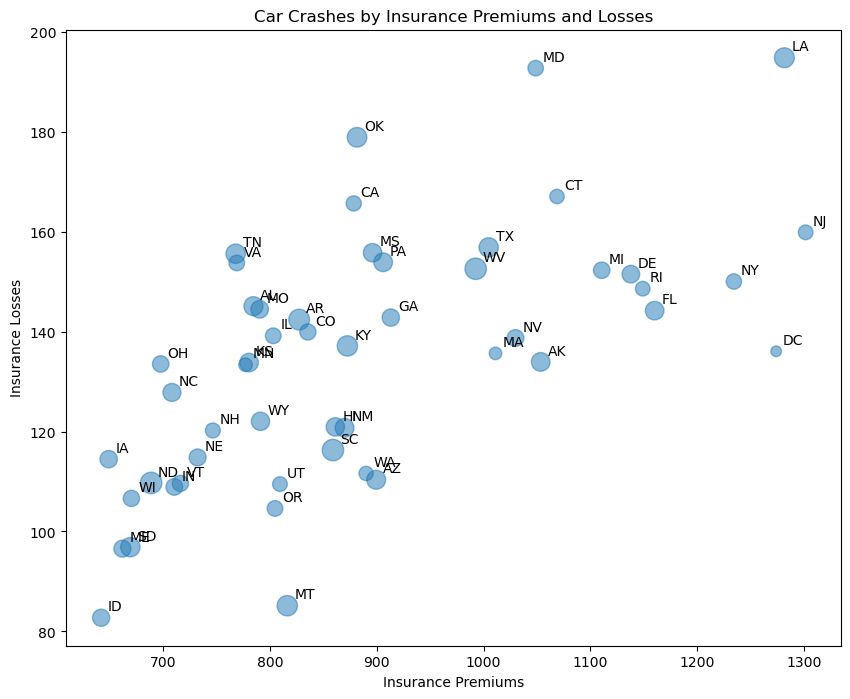

In [26]:
# ANSWER - assisted by ChatGPT
plt.figure(figsize=(10, 8))
plt.scatter(x=df_car_crashes['ins_premium'], y=df_car_crashes['ins_losses'], s=df_car_crashes['total']*10, alpha=0.5)

for i in range(len(df_car_crashes)):
    plt.annotate(df_car_crashes.index[i], 
                 xy=(df_car_crashes['ins_premium'][i], df_car_crashes['ins_losses'][i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=10)

plt.xlabel('Insurance Premiums')
plt.ylabel('Insurance Losses')
plt.title('Car Crashes by Insurance Premiums and Losses')


plt.show()



---
**26)** [P] Next, generate **two** plots that show some relationships between variables in the data. Try to use as many variables as you can without creating chaos! Don't just throw in multiple variables for the sake of showing them, only include them if it makes sense to do so. **Your aim is to derive meaning from your data. Good visualizations tell a story.** Strive to use at additional variables as size, as color, or even shape in your data so you can show more than just 2 variables on a single plot. Add titles, legends and label your axes as appropriate.

After each plot, create a markdown cell and briefly draw conclusions from your plot.

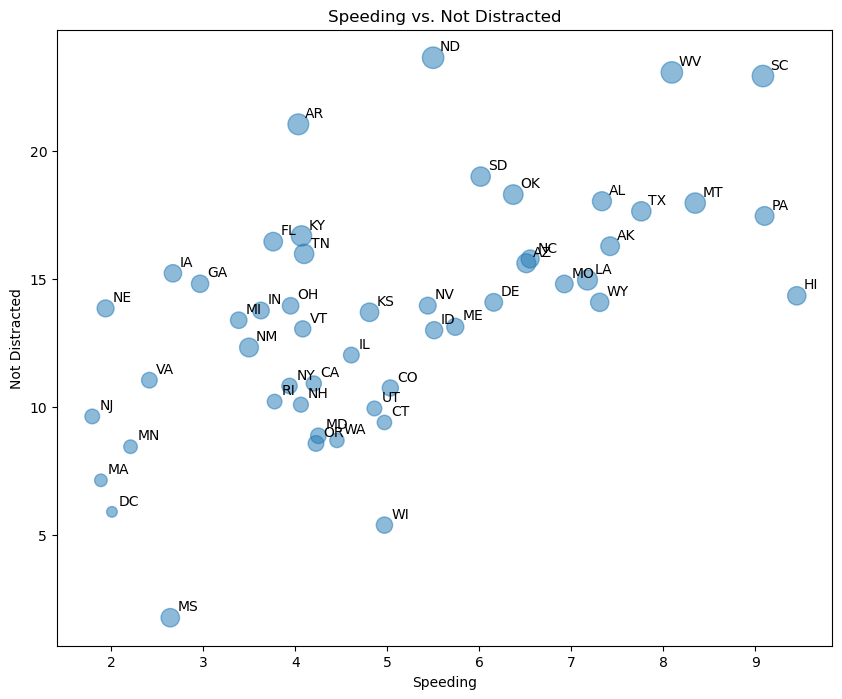

In [23]:
# ANSWER
plt.figure(figsize=(10, 8))
plt.scatter(x=df_car_crashes['speeding'], y=df_car_crashes['not_distracted'], s=df_car_crashes['total']*10, alpha=0.5)

for i in range(len(df_car_crashes)):
    plt.annotate(df_car_crashes.index[i], 
                 xy=(df_car_crashes['speeding'][i], df_car_crashes['not_distracted'][i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=10)
    
plt.xlabel('Speeding')
plt.ylabel('Not Distracted')
plt.title('Speeding vs. Not Distracted')

plt.show()





**ANSWER:**
South Carolina and West Virginia have the most speeding accidents where the driver is not distracted. Minnesota is the standalone outlier on the low end of both speeding and not distracted, meaning this state has the most non-speeding distracted driving accidents.



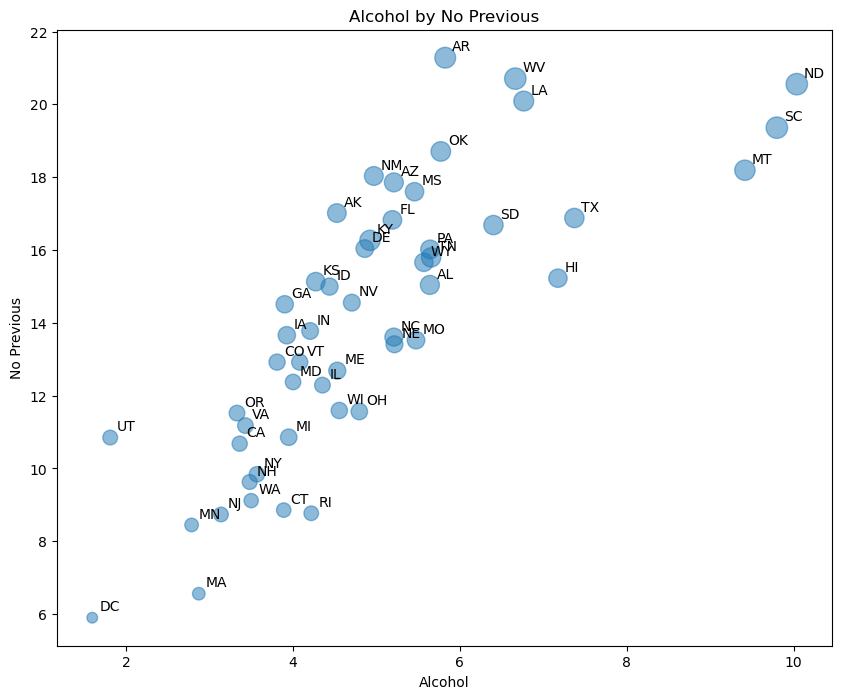

In [24]:
# ANSWER:
plt.figure(figsize=(10, 8))
plt.scatter(x=df_car_crashes['alcohol'], y=df_car_crashes['no_previous'], s=df_car_crashes['total']*10, alpha=0.5)

for i in range(len(df_car_crashes)):
    plt.annotate(df_car_crashes.index[i], 
                 xy=(df_car_crashes['alcohol'][i], df_car_crashes['no_previous'][i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=10)
    
plt.xlabel('Alcohol')
plt.ylabel('No Previous')
plt.title('Alcohol by No Previous')

plt.show()





**ANSWER:**
North Dakota, South Carolina, and Montana have all the highest rates of alcohol related crashes without previous accidents. DC and Mass are low outliers for alcohol and no previous, meaning they do not have as many alcohol related accidents but there are few people who have never been in an accident.



**27)**	 [P] Now, we're going to look at the data visually, but use a PCA transformation to help give a better sense of trends and differences among our data.

Run a full PCA on the zscore transformed data. Set `n_components` to be the number of variables in the original data. Be sure to fit the data to your PCA model, and then output the components, explained variance, and the explained variance ratio.

In [37]:
# ANSWER
pca = PCA(n_components=len(df_car_crashes.columns))

pca.fit(df_car_crashes_zscore)

print("PCA Components:\n", pca.components_)
print("\nExplained Variance:\n", pca.explained_variance_)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)

PCA Components:
 [[ 0.47947078  0.37534719  0.45437635  0.4380328   0.45703414 -0.1308319
  -0.06996048]
 [ 0.06893769  0.0765846   0.03345835  0.04237473  0.0961294   0.6852266
   0.71252436]
 [-0.26908802  0.81826935  0.08293253 -0.12616845 -0.31798812  0.25614247
  -0.26173503]
 [ 0.0389558  -0.36374887  0.14834351  0.1712655   0.03948141  0.65639617
  -0.61839859]
 [ 0.14597659 -0.02282818  0.35479821 -0.85646854  0.33611019  0.04214531
  -0.06327152]
 [-0.16970508 -0.22479246  0.7837677   0.08510479 -0.50401185 -0.11577348
   0.17805184]
 [ 0.80082487  0.01784783 -0.15285774 -0.14247844 -0.55875371  0.04126619
  -0.02804966]]

Explained Variance:
 [4.0942308  1.6095732  0.56161403 0.35753958 0.2863854  0.20263316
 0.02802383]

Explained Variance Ratio:
 [0.57342168 0.22543042 0.07865743 0.05007557 0.04011    0.02837999
 0.00392491]


---
**28)**	[M] Use your intuition – what do the weights of the first couple of PCs suggest explains most of the variance in the data? Are there certain variables that seem to be more significant? Or are they all playing a role?

**ANSWER:**
The weights of the first couple of PCs suggest that 

---
**29)** [P] Create a plot of the cumulative sum of the explained variance. How many components will get you to 90% of the explained variance?

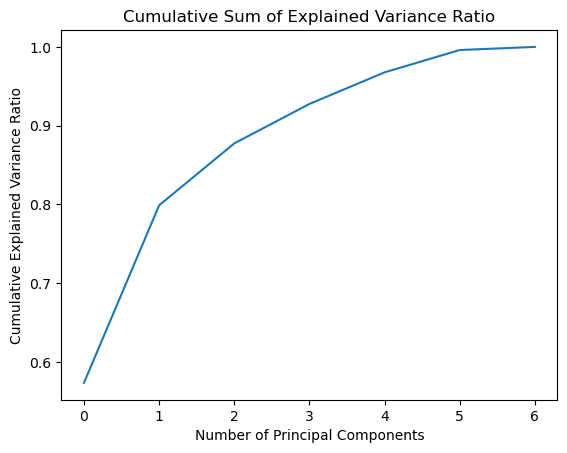

In [38]:
# ANSWER
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.title("Cumulative Sum of Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()



---
**30)**	[P] Transform the z_score transformed data using your PCA model (HINT: use the `transform` function of the pca object.)

(NOTE: I often just store the transformed data temporarily as some arbitrary variable, X, to make it easier to manipulate the data for plotting and also use later.)

In [39]:
# ANSWER
X = pca.transform(df_car_crashes_zscore)

X

array([[ 1.60367129e+00,  1.33449270e-01,  3.17880933e-01,
        -7.95292959e-01, -5.79718779e-01,  4.62225594e-02,
         2.10184946e-01],
       [ 1.14421188e+00,  8.58233989e-01,  7.36626419e-01,
         3.18987630e-01, -2.28701228e-01, -1.00262531e+00,
         8.96584827e-03],
       [ 1.43217197e+00, -4.20505617e-01,  3.38136402e-01,
         5.52513137e-01,  1.68718050e-01, -8.04522784e-01,
        -7.61074198e-02],
       [ 2.49158352e+00,  3.48968117e-01, -1.78874742e+00,
         2.64063876e-01, -3.72382262e-01, -4.81849391e-01,
        -1.47636460e-01],
       [-1.75063825e+00,  6.33625169e-01, -1.36175804e-01,
        -9.74916048e-01, -3.15811468e-01,  1.78509622e-01,
        -6.89582935e-02],
       [-9.25120249e-01, -1.54387816e-01,  1.46176686e-01,
        -5.68095742e-01,  1.16419849e-01, -2.40859069e-01,
        -9.84275090e-02],
       [-2.12535925e+00,  1.37060016e+00,  7.43077608e-01,
        -4.85553083e-01, -8.83371541e-02,  4.86531040e-01,
         2.0255800

---
**31)**	[P] Generate a 2D plot using the first two principal components as your x and y coordinates. Be sure to label each point, and label your axes as component 1 and component 2, respectively.

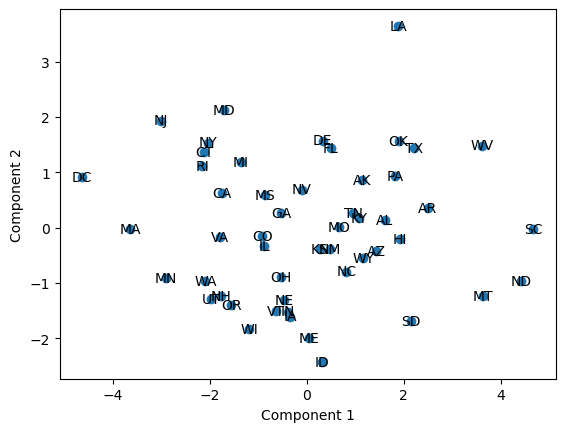

In [46]:
# ANSWER
pc1 = X[:, 0]
pc2 = X[:, 1]
plt.scatter(pc1, pc2)

for i, abbrev in enumerate(df_car_crashes.index):
    plt.text(pc1[i], pc2[i], abbrev, ha='center', va='center')

plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()


---
**32)**	[M] Compare the states you reported as potential outliers above to those that appear to be outliers from your plot. Do the same results seem to hold?

**ANSWER:**
The results do seem to hold for SC and ND, but does not hold for DC. We also can now see that LA is an outlier as well.



---
**33)**	[P] Read how to generate a 3D scatterplot, and use it to generate a scatterplot of the first 3 components.

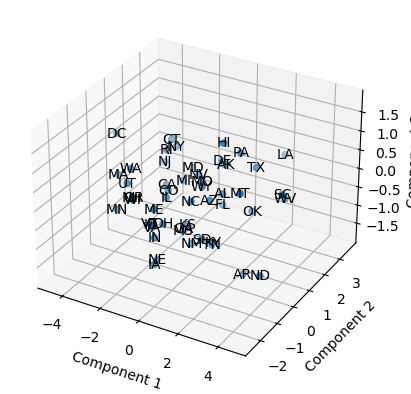

In [48]:
# ANSWER
pc3 = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3)

for i, abbrev in enumerate(df_car_crashes.index):
    ax.text(pc1[i], pc2[i], pc3[i], abbrev, ha='center', va='center')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()






---
**34)**	[M] Do the same outliers still stand out?

**ANSWER:**
Now, we see some of the same outliers but there are a few states that are severe negative outliers, like WA, MA, and UT.

